In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import json
# load data using Python JSON module
with open('./data/meta.json','r') as f:
    meta = json.loads(f.read())
    
# Normalizing data
meta = pd.json_normalize(meta, record_path =['meta'])
meta.head()

,productid,brand,category,subcategory,name
0,HBV00000AX6LR,Palette,Kişisel Bakım,Saç Bakımı,Palette Kalıcı Doğal Renkler 10-4 PAPATYA
1,HBV00000BSAQG,Best,Pet Shop,Kedi,Best Pet Jöle İçinde Parça Etli Somonlu Konser...
2,HBV00000JUHBA,Tarım Kredi,Temel Gıda,"Bakliyat, Pirinç, Makarna",Türkiye Tarım Kredi Koop.Yeşil Mercimek 1 kg
3,HBV00000NE0QI,Namet,"Et, Balık, Şarküteri",Şarküteri,Namet Fıstıklı Macar Salam 100 gr
4,HBV00000NE0UQ,Muratbey,Kahvaltılık ve Süt,Peynir,Muratbey Burgu Peyniri 250 gr


In [3]:
meta.describe()

,productid,brand,category,subcategory,name
count,10235,9777,10235,10235,10235
unique,10235,789,20,132,10123
top,SGBEST35746612237,Carrefour,Atıştırmalık,Saç Bakımı,Carrefour Yumurta 30'lu M Boy
freq,1,396,1113,556,3


In [4]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10236 entries, 0 to 10235
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   productid    10235 non-null  object
 1   brand        9777 non-null   object
 2   category     10235 non-null  object
 3   subcategory  10235 non-null  object
 4   name         10235 non-null  object
dtypes: object(5)
memory usage: 400.0+ KB


In [5]:
with open('./data/events.json','r') as f:
    events = json.loads(f.read())
    
# Normalizing data
events = pd.json_normalize(events, record_path =['events'])
events.head()

,event,sessionid,eventtime,price,productid
0,cart,a0655eee-1267-4820-af21-ad8ac068ff7a,2020-06-01T08:59:16.406Z,14.48,HBV00000NVZE8
1,cart,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,2020-06-01T08:59:46.580Z,49.90,HBV00000U2B18
2,cart,5e594788-78a0-44dd-8e66-37022d48f691,2020-06-01T08:59:33.308Z,1.99,OFIS3101-080
3,cart,fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,2020-06-01T08:59:31.911Z,2.25,HBV00000NVZBW
4,cart,9e9d4f7e-898c-40fb-aae9-256c40779933,2020-06-01T08:59:33.888Z,9.95,HBV00000NE0T4


In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387656 entries, 0 to 387655
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   event      387656 non-null  object
 1   sessionid  387656 non-null  object
 2   eventtime  387656 non-null  object
 3   price      387650 non-null  object
 4   productid  387650 non-null  object
dtypes: object(5)
memory usage: 14.8+ MB


In [7]:
events.describe()

,event,sessionid,eventtime,price,productid
count,387656,387656,387656,387650,387650
unique,1,54442,387196,1217,10235
top,cart,08a906d4-4999-403c-a334-d296106d49cf,2020-06-03T13:19:11.942Z,18.48,HBV00000NVZGU
freq,387656,308,3,16750,17082


- NaN verilerin çıkarılması

In [8]:
events.dropna(how="any", inplace=True)

- eventtime kolonunun analizlerde kullanıma uygun hale getirilmesi

In [9]:
events["eventtime"] = pd.to_datetime(events['eventtime']).dt.strftime("%Y-%m-%d %H:%M:%S")
events.head()

,event,sessionid,eventtime,price,productid
0,cart,a0655eee-1267-4820-af21-ad8ac068ff7a,2020-06-01 08:59:16,14.48,HBV00000NVZE8
1,cart,d2ea7bd3-9235-4a9f-a9ea-d7f296e71318,2020-06-01 08:59:46,49.90,HBV00000U2B18
2,cart,5e594788-78a0-44dd-8e66-37022d48f691,2020-06-01 08:59:33,1.99,OFIS3101-080
3,cart,fdfeb652-22fa-4153-b9b5-4dfa0dcaffdf,2020-06-01 08:59:31,2.25,HBV00000NVZBW
4,cart,9e9d4f7e-898c-40fb-aae9-256c40779933,2020-06-01 08:59:33,9.95,HBV00000NE0T4


## En Popüler Ürünlerin Belirlenmesi

In [10]:
# Bu sebeple ilk 200 ürüne odaklanıldı.
most_popular = pd.DataFrame(events["productid"].value_counts()[:200])
most_popular.columns={"Count"}
most_popular.index.name = 'productid'


# productID bilgisi kullanılarak meta dosyası içerisinde ilgili bilgiler elde edildi.
# Bu amaçla pandas kütüphanesinin merge metodundan yararlanıldı.
# Merge iki dataframe'i eşleştirmeye yarıyor.
most_popular = pd.merge(most_popular, meta, left_on='productid', right_on='productid', how='left')

- En popüler 20 ürüne ait bilgiler aşağıda mevcuttur.

In [11]:
most_popular.head(20)

,productid,Count,brand,category,subcategory,name
0,HBV00000NVZGU,17082,None,"Et, Balık, Şarküteri",Kırmızı Et,Dana Biftek 250 gr
1,HBV00000NVZBI,5557,None,Meyve ve Sebze,Sebze,Patates 1 kg
2,HBV00000OE7X7,5070,None,Meyve ve Sebze,Sebze,Domates Pembe 500 gr
3,HBV00000NVZBY,3824,None,Meyve ve Sebze,Sebze,Domates Salkım 500 gr
4,HBV00000O2S62,3704,None,Meyve ve Sebze,Meyve,Çilek 250 gr
5,HBV00000NVZEC,3057,None,"Et, Balık, Şarküteri",Kırmızı Et,Dana Kıyma (%14-%20 Yağ) 250 gr
6,HBV00000OE7QQ,3017,None,Meyve ve Sebze,Meyve,Limon Lamas 500 gr
7,HBV00000NVZE8,2733,None,"Et, Balık, Şarküteri",Kırmızı Et,Dana Kıyma (%5-%7 Yağ) 250 gr
8,HBV00000PV5YE,2657,Beypazarı,İçecekler,Gazlı İçecekler,Beypazarı Doğal Maden Suyu 200 ml
9,HBV00000NVZDU,2595,None,"Et, Balık, Şarküteri",Kırmızı Et,Dana Kuşbaşı 500 gr


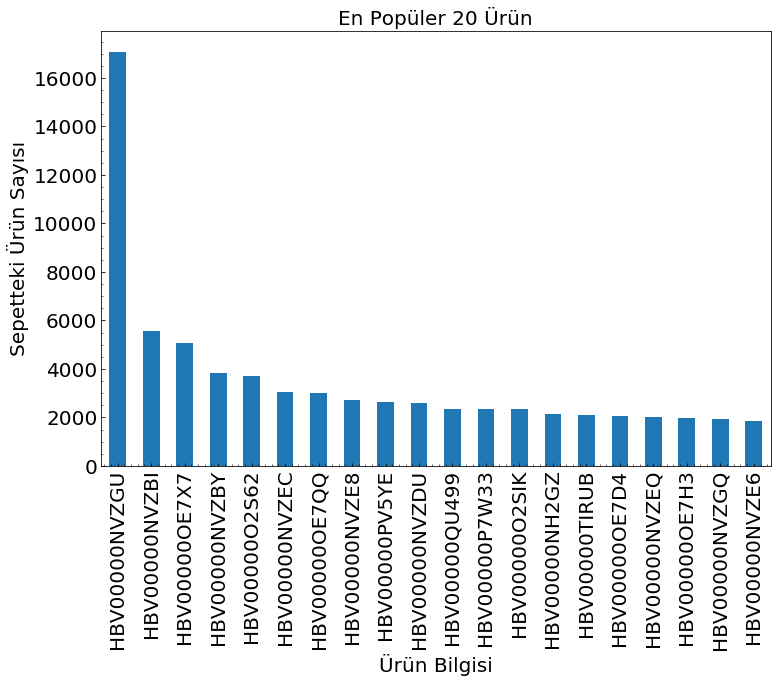

In [12]:
fig, ax = plt.subplots(1, figsize=(12,8))

events["productid"].value_counts()[:20].plot(kind = "bar", ax=ax)

ax.set_title("En Popüler 20 Ürün", fontsize=20)
ax.set_xlabel("Ürün Bilgisi", fontsize=20)
ax.set_ylabel("Sepetteki Ürün Sayısı", fontsize=20)

ax.minorticks_on()
ax.tick_params(axis='both', which='both', labelsize=20)
ax.tick_params(axis='x', which='minor', direction='in')
ax.tick_params(axis='y', which='minor', direction='in')
ax.tick_params(axis='x', which='major', direction='in')
ax.tick_params(axis='y', which='major', direction='in');

## Kelime Bulutunun Oluşturulması

**Yapılan Metin Ön İşleme Adımları:**
- Ürün ismi içerisindeki bütün kelimeler, küçük harflere dönüştürülerek farklılıklar ortadan kaldırıldı.
- Mevcutsa Türkçe Stop-words’lerin silinmesi (Ek olarak token uzunluğu >2)
- Noktalama işaretleri, özel karakterlerin ve sayıların silinmesi 


In [13]:
import string, re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stops = set(stopwords.words('turkish'))

def preprocess(text):
    result=[]
    text = re.sub(r'[' + string.punctuation + ']+', ' ', text.lower())
    for token in word_tokenize(text):
        if token not in stops and len(token) > 2:
            result.append(token)
    return " ".join(i for i in result if not i.isdigit())

In [14]:
most_popular["cleaned_cat"] = most_popular['name'].map(preprocess)

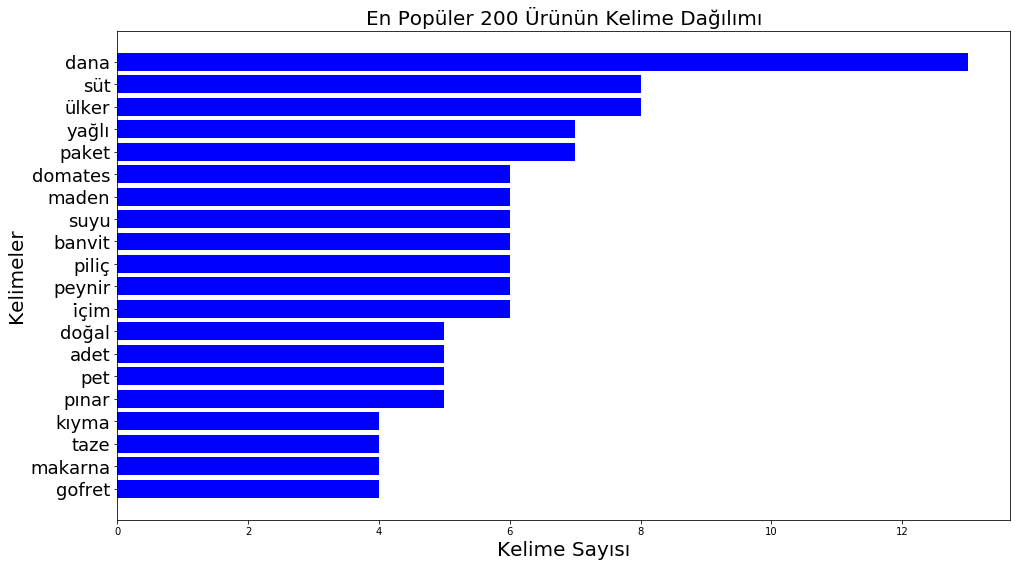

In [15]:
from itertools import chain
from collections import Counter

words = [x.split() for x in most_popular.cleaned_cat.values]
cx = Counter(list(chain(*words)))
top = 20
most_common = cx.most_common()[1:]

x, y = zip(*most_common[:top])
fig, ax = plt.subplots(1, figsize=(16,9))
ax.barh(range(len(x)), y, color='blue')
ax.invert_yaxis()
ax.set_xlabel('Kelime Sayısı', fontsize=20)
ax.set_ylabel('Kelimeler' , fontsize=20)
ax.set_title('En Popüler 200 Ürünün Kelime Dağılımı' , fontsize=20)
ax.set_yticks(np.arange(len(x)))
ax.set_yticklabels(x, fontsize=18)
plt.show()

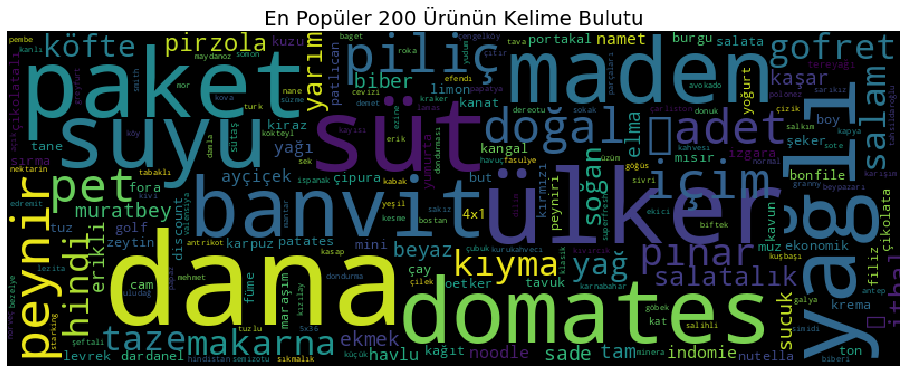

In [16]:
from wordcloud import WordCloud

d = {}
for k,v in most_common[:]:
    d[k] = int(v)

wc = WordCloud(relative_scaling=.5, width=800, height=300, background_color='black',stopwords=stops).generate_from_frequencies(d)
fig = plt.figure(1,figsize=(16,8))
plt.imshow(wc)
plt.title("En Popüler 200 Ürünün Kelime Bulutu", fontsize=20)
plt.axis('off')
plt.show()

## En Fazla Sipariş Veren Kişilerin Belirlenmesi

- En fazla sipariş veren 20 kişi

In [17]:
most_sessionid = pd.DataFrame(events["sessionid"].value_counts()[:20])
most_sessionid.columns={"Count"}
most_sessionid.index.name = 'sessionid'
most_sessionid.head(20)

,Count
sessionid,
08a906d4-4999-403c-a334-d296106d49cf,308
724a0c30-db26-4cc4-9ee3-e36a663aa43e,287
25370f38-cfd0-4892-93bc-cc1b5b40fa2e,249
174f271c-c13d-48e3-881c-746637fc2002,226
3bb95653-7b91-49dc-ad5e-0f0891d366e5,189
768111cc-500f-4e07-9fd9-00ebd76937d1,186
d368706a-ecc7-4ffb-bde7-1f2264c4cfc5,185
701b0a10-e4ab-423e-8226-db2a606efe44,178
d41441e9-6acd-4f2e-ad6d-e6d8459e5834,170
